Accuracy: 0.9790
ROC AUC: 0.9975
Precision-Recall AUC: 0.9973


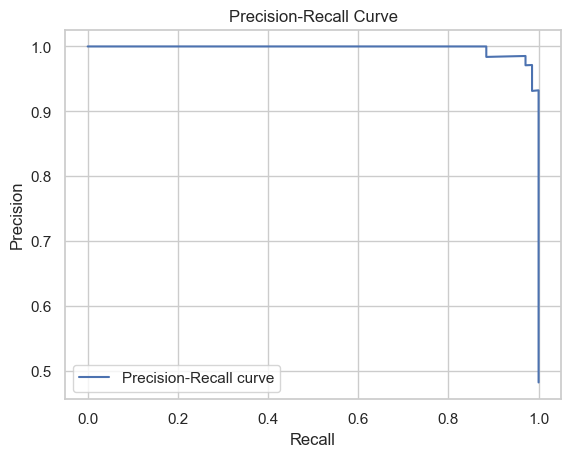

Threshold: 0.0
Accuracy: 0.4825
Precision-Recall AUC: 0.9973
-----
Threshold: 0.1
Accuracy: 0.9371
Precision-Recall AUC: 0.9973
-----
Threshold: 0.2
Accuracy: 0.9650
Precision-Recall AUC: 0.9973
-----
Threshold: 0.3
Accuracy: 0.9790
Precision-Recall AUC: 0.9973
-----
Threshold: 0.4
Accuracy: 0.9720
Precision-Recall AUC: 0.9973
-----
Threshold: 0.5
Accuracy: 0.9790
Precision-Recall AUC: 0.9973
-----
Threshold: 0.6
Accuracy: 0.9650
Precision-Recall AUC: 0.9973
-----
Threshold: 0.7
Accuracy: 0.9580
Precision-Recall AUC: 0.9973
-----
Threshold: 0.8
Accuracy: 0.9441
Precision-Recall AUC: 0.9973
-----
Threshold: 0.9
Accuracy: 0.8951
Precision-Recall AUC: 0.9973
-----
Threshold: 1.0
Accuracy: 0.5175
Precision-Recall AUC: 0.9973
-----


In [21]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Address class imbalance with Synthetic Minority Over-sampling Technique (SMOTE)
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X, y)

# Standardize features to have mean=0 and variance=1 necessary for some models
scaler = StandardScaler()
X_resampled = scaler.fit_transform(X_resampled)

# Split the dataset into training and testing sets with a ratio of 80-20
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize RandomForest and GradientBoosting classifiers
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

# Define hyperparameters grid for Random Forest and Gradient Boosting for optimization
rf_params = {
    'n_estimators': [100, 200],         # Number of trees in the forest
    'max_depth': [None, 10, 20],        # Maximum depth of the tree
    'min_samples_split': [2, 5]         # Minimum number of samples required to split an internal node
}

gb_params = {
    'n_estimators': [100, 150],         # Number of boosting stages
    'learning_rate': [0.05, 0.1],       # Learning rate shrinks contribution of each tree
    'max_depth': [3, 5]                 # Maximum depth of the individual regression estimators
}

# Conduct Grid Search for Random Forest and Gradient Boosting to find best hyperparameters
grid_rf = GridSearchCV(estimator=rf, param_grid=rf_params, cv=5, scoring='accuracy')
grid_gb = GridSearchCV(estimator=gb, param_grid=gb_params, cv=5, scoring='accuracy')

# Fit the models to the training data
grid_rf.fit(X_train, y_train)
grid_gb.fit(X_train, y_train)

# Create a Voting Classifier for ensemble learning with soft voting
voting_clf = VotingClassifier(
    estimators=[('rf', grid_rf.best_estimator_), ('gb', grid_gb.best_estimator_)],
    voting='soft'  # Soft voting uses predicted probabilities
)

# Train the ensemble model
voting_clf.fit(X_train, y_train)

# Make predictions using the test set
y_pred = voting_clf.predict(X_test)
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Evaluate the model's performance using various metrics
accuracy = accuracy_score(y_test, y_pred) 
roc_auc = roc_auc_score(y_test, y_prob)   
precision, recall, _ = precision_recall_curve(y_test, y_prob)  
pr_auc = auc(recall, precision)  

# Display evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')
print(f'Precision-Recall AUC: {pr_auc:.4f}')

# Plot the Precision-Recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

# Explore different thresholds and analyze impact
thresholds = np.arange(0.0, 1.1, 0.1)
for threshold in thresholds:
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    
    print(f'Threshold: {threshold:.1f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision-Recall AUC: {pr_auc:.4f}')
    print('-----')


In [ ]:

# Calculate predicted probabilities
y_prob = voting_clf.predict_proba(X_test)[:, 1]

# Explore different thresholds
thresholds = np.arange(0.0, 1.1, 0.1)
for threshold in thresholds:
    # Classify based on threshold
    y_pred_thresholded = (y_prob >= threshold).astype(int)
    
    # Calculate precision, recall, and PR AUC for this threshold
    accuracy = accuracy_score(y_test, y_pred_thresholded)
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    
    print(f'Threshold: {threshold:.1f}')
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision-Recall AUC: {pr_auc:.4f}')
    print('-----')

# Plot one of the adjusted PR Curves

import matplotlib.pyplot as plt

plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Adjusted Precision-Recall Curve')
plt.legend()
plt.show()
